# Bias and Variance of ridge regression

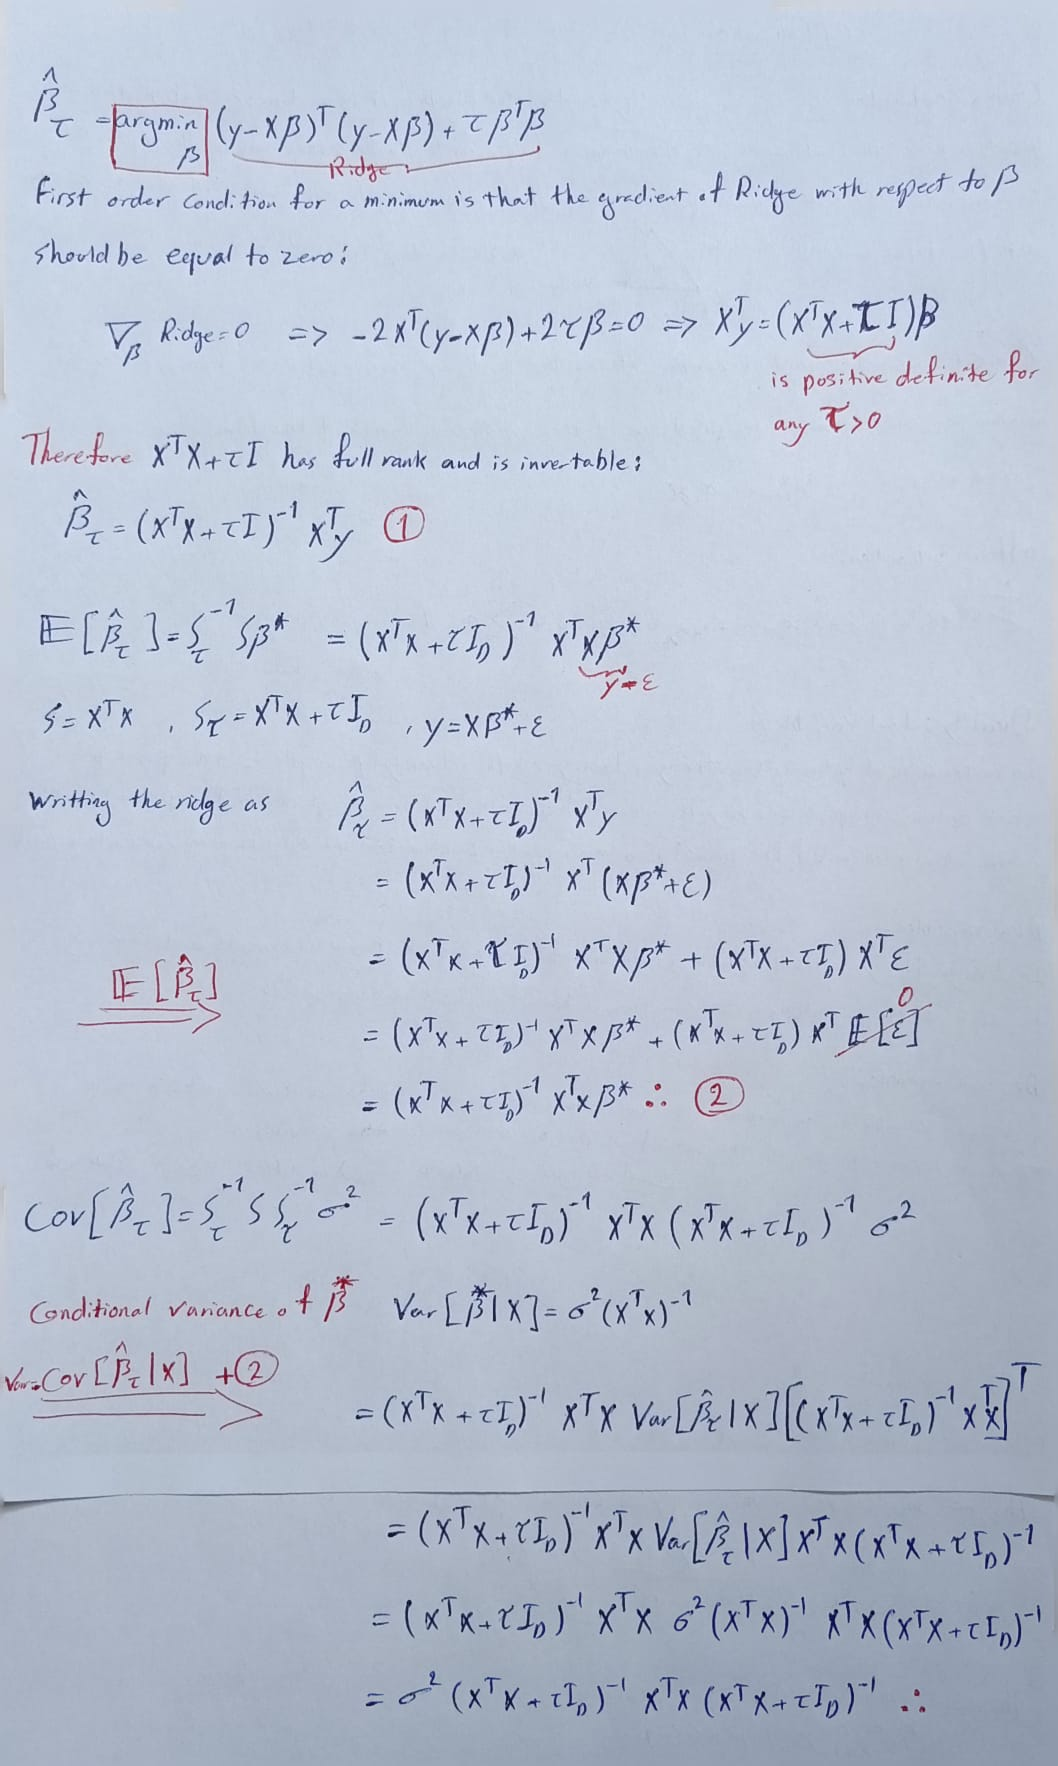

# Orthogonal Matching Pursuit

In [1]:
import numpy as np

In [2]:
#random matrices to test the function

L = 20 # dimension of the unknown vector w
T = 5 # assume w is T-sparse
w = np.zeros(L)
rgn = np.random.RandomState(0)

# randomly choose T entries, and randomly assign values
w[rgn.randint(0,L,T)] = rgn.normal(loc=0.0,scale=1.0,size=T)

N = 20 # dimension of the sensing matrix 
X = rgn.normal(loc=0.0,scale=1.0,size=(N,L))
y = X.dot(w)# randomly choose T entries, and randomly assign values
w[rgn.randint(0,L,T)] = rgn.normal(loc=0.0,scale=1.0,size=T)


In [3]:
def corr(x,y):
    return abs(x.dot(y))/np.sqrt((x**2).sum())

In [4]:
def omp_regression(X, y, T):
    beta = np.zeros(L)
    error = y
    A = [] # the support
    
    for i in range(T):
        # find the column has maximum correlation with the error
        corrs = [ corr(x,error) for x in X.T]
        ind = np.argmax(corrs)
        A.append(ind)

        B = X[:,A] # active X
        # LS estimate using active support
        beta_tilde = np.linalg.inv(B.T.dot(B)).dot(B.T).dot(y)

        # insert estimated beta into the proper location
        beta[A] = beta_tilde

        # update the error vector
        error = y-X.dot(beta)
    return beta_tilde
    

In [5]:
omp_regression(X,y,T)

array([ 2.04785614,  1.90926027, -0.36121145,  0.97873798,  1.87398011])